<a href="https://colab.research.google.com/github/ashborn8/EjercicioMulticapa/blob/main/Ejercicio_Multicapa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
# 1. Importar las bibliotecas necesarias
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt


In [17]:
# 2. Cargar y preprocesar el dataset CIFAR-10
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalizar las imágenes a valores entre 0 y 1
x_train, x_test = x_train / 255.0, x_test / 255.0


In [18]:
# 3. Definir la arquitectura de la red neuronal convolucional (CNN)
model = models.Sequential()

# Primera capa convolucional
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Segunda capa convolucional
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Capa de pooling
model.add(layers.MaxPooling2D((2, 2)))

# Capa de aplanamiento
model.add(layers.Flatten())

# Capa densa completamente conectada con 64 neuronas
model.add(layers.Dense(64, activation='relu'))

# Capa de salida con 10 neuronas (una para cada clase de CIFAR-10)
model.add(layers.Dense(10))


In [24]:
# 4. Compilar el modelo
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy']) # Add 'accuracy' to the metrics list

In [25]:
# 5. Entrenar el modelo
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 [==============================] - 26s 16ms/step - loss: 1.3699 - accuracy: 0.5115 - val_loss: 1.1094 - val_accuracy: 0.6043
Epoch 2/10
1563/1563 [==============================] - 26s 16ms/step - loss: 0.9851 - accuracy: 0.6558 - val_loss: 0.9811 - val_accuracy: 0.6524
Epoch 3/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.8234 - accuracy: 0.7150 - val_loss: 0.9429 - val_accuracy: 0.6709
Epoch 4/10
1563/1563 [==============================] - 28s 18ms/step - loss: 0.7032 - accuracy: 0.7543 - val_loss: 0.9792 - val_accuracy: 0.6666
Epoch 5/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.5893 - accuracy: 0.7935 - val_loss: 0.9999 - val_accuracy: 0.6685
Epoch 6/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.4852 - accuracy: 0.8288 - val_loss: 1.1100 - val_accuracy: 0.6659
Epoch 7/10
1563/1563 [==============================] - 27s 17ms/step - loss: 0.3952 - accuracy: 0.8587 - val_loss: 1.1383 -

In [26]:
# 6. Evaluar el modelo
test_loss = model.evaluate(x_test, y_test, verbose=2) # Get the loss value

# Get accuracy by predicting on test set and comparing with true labels
import numpy as np
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
test_acc = np.mean(y_pred_classes == y_test[:, 0]) # Compare predictions with true labels

print(f'Precisión en el conjunto de prueba: {test_acc}')

313/313 - 2s - loss: 1.6949 - accuracy: 0.6549 - 2s/epoch - 6ms/step
313/313 [==============================] - 2s 6ms/step
Precisión en el conjunto de prueba: 0.6549


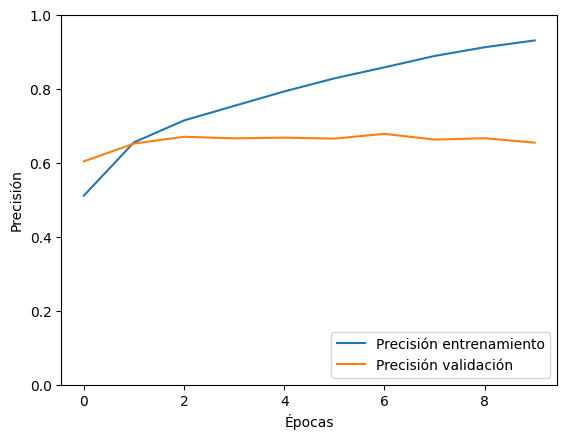

In [27]:
# 7. Graficar el historial de precisión y pérdida
plt.plot(history.history['accuracy'], label='Precisión entrenamiento')
plt.plot(history.history['val_accuracy'], label = 'Precisión validación')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()
